## Import needed packages

In [1]:
library("FactoMineR")
library("factoextra")

Warning message:
"package 'FactoMineR' was built under R version 3.5.3"Warning message:
"package 'factoextra' was built under R version 3.5.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


## Look into data

In [3]:
data(decathlon2)
head(decathlon2, 3)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar


Get only needed values

In [22]:
decathlon2.active <- decathlon2[1:23, 1:10]

Note that, by default, the function PCA() [in FactoMineR], standardizes the data automatically during the PCA; so you don’t need do this transformation before the PCA. 

In [23]:
res.pca <- PCA(decathlon2.active, graph = FALSE)
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

## Visualization and Interpretation

### Eigenvalues/Variances

In [27]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029
Dim.10,0.1219710,1.219710,100.00000


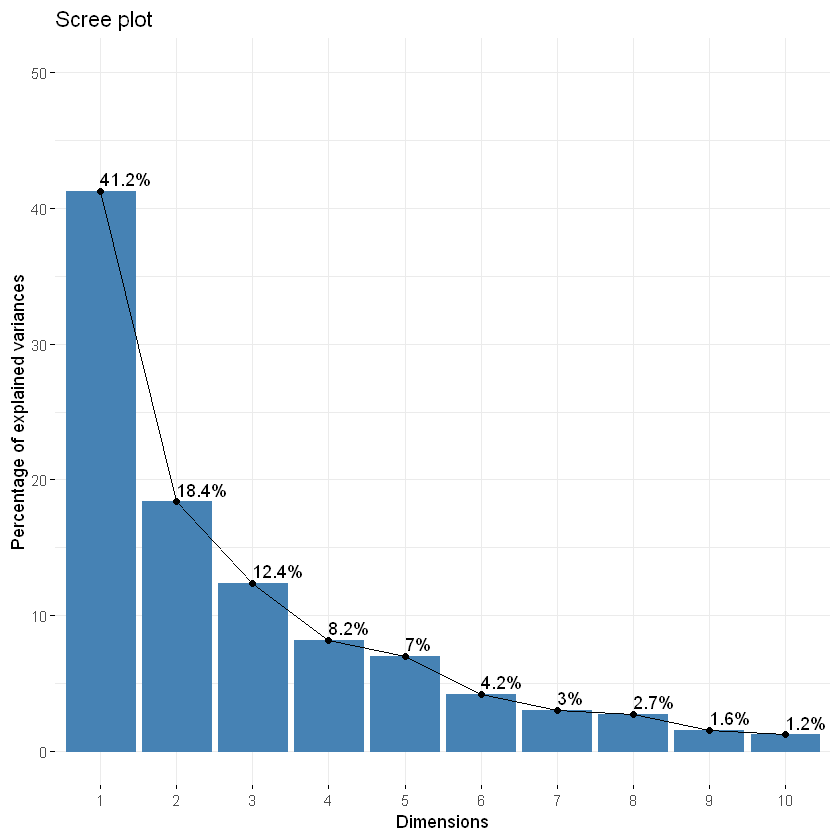

In [28]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

## Graph of variables

In [35]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [36]:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.03357320,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.11538956,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.12846837,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.14455012,0.4027002
X400m,-0.7016034,0.29017826,0.2835329,0.43082552,0.1039085
X110m.hurdle,-0.7641252,-0.02474081,0.4488873,-0.01689589,0.2242200


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.0321836641,0.09093628,0.0011271597,0.03780845
Long.jump,0.6307229,0.0788806285,0.03630798,0.0133147506,0.05436203
Shot.put,0.5386279,0.0072938636,0.26790749,0.0165041211,0.06190783
High.jump,0.3722025,0.2164242070,0.10895622,0.0208947375,0.16216747
X400m,0.4922473,0.0842034209,0.08039091,0.1856106269,0.01079698
X110m.hurdle,0.5838873,0.0006121077,0.20149984,0.0002854712,0.05027463


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.13755240,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.62485936,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.01407269,8.824401
High.jump,9.024811,11.7715838,8.792888,2.54987951,23.115504
X400m,11.935544,4.5799296,6.487636,22.65090599,1.539012
X110m.hurdle,14.157544,0.0332933,16.261261,0.03483735,7.166193


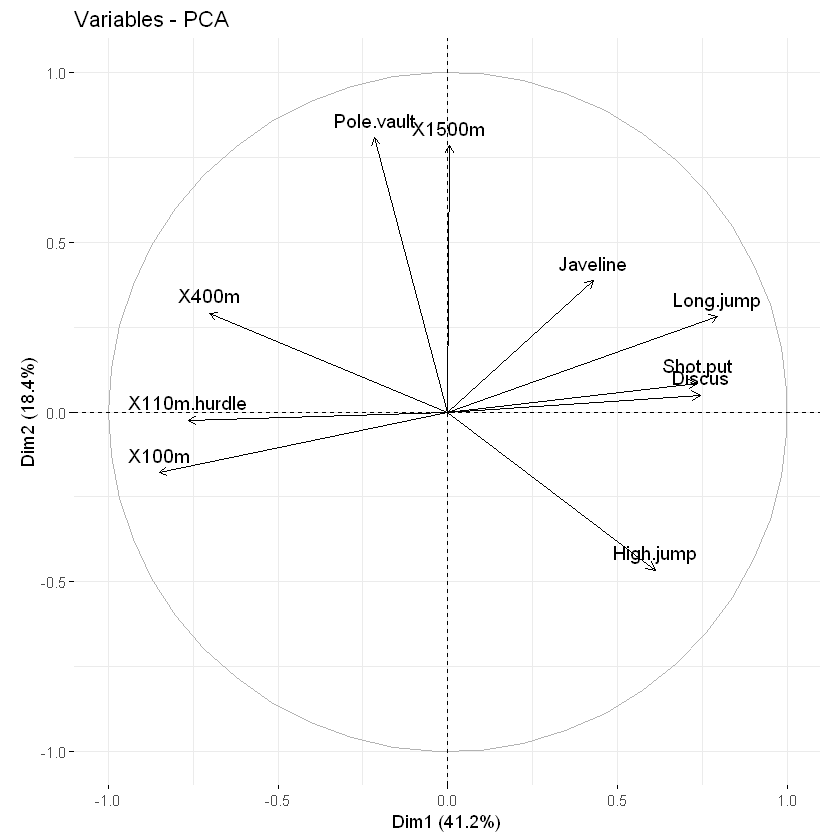

In [37]:
fviz_pca_var(res.pca, col.var = "black")

Warning message:
"package 'corrplot' was built under R version 3.5.3"corrplot 0.84 loaded


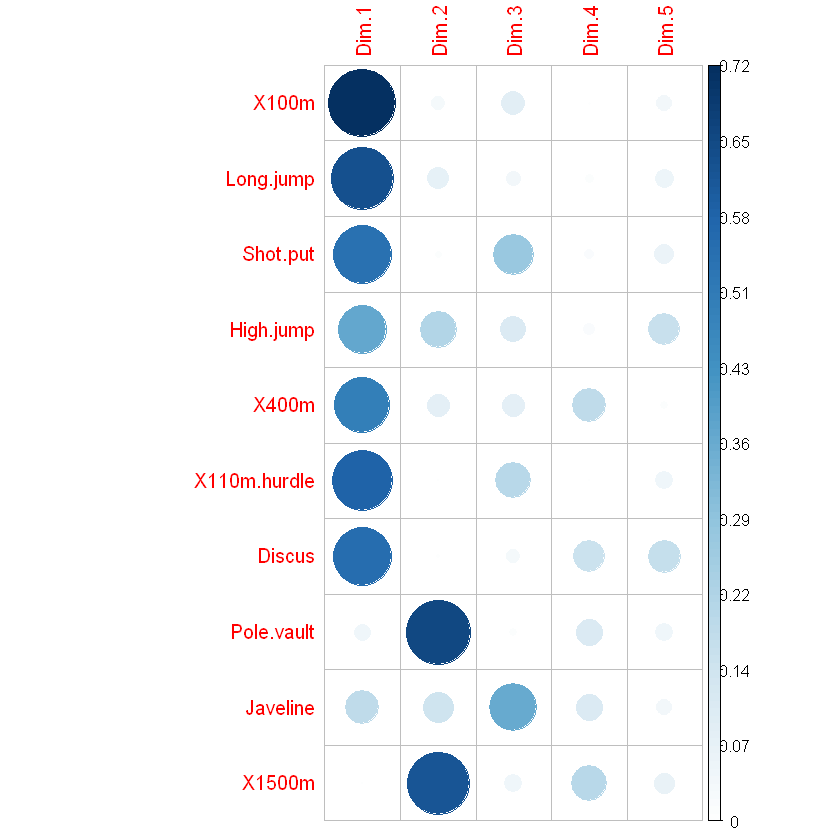

In [39]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

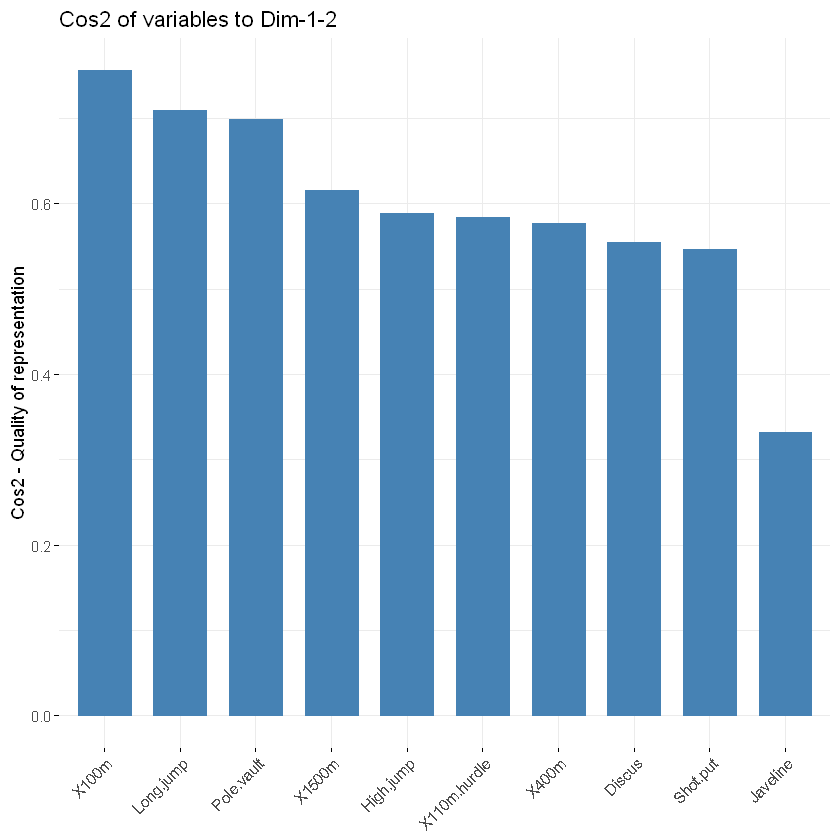

In [40]:
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2)

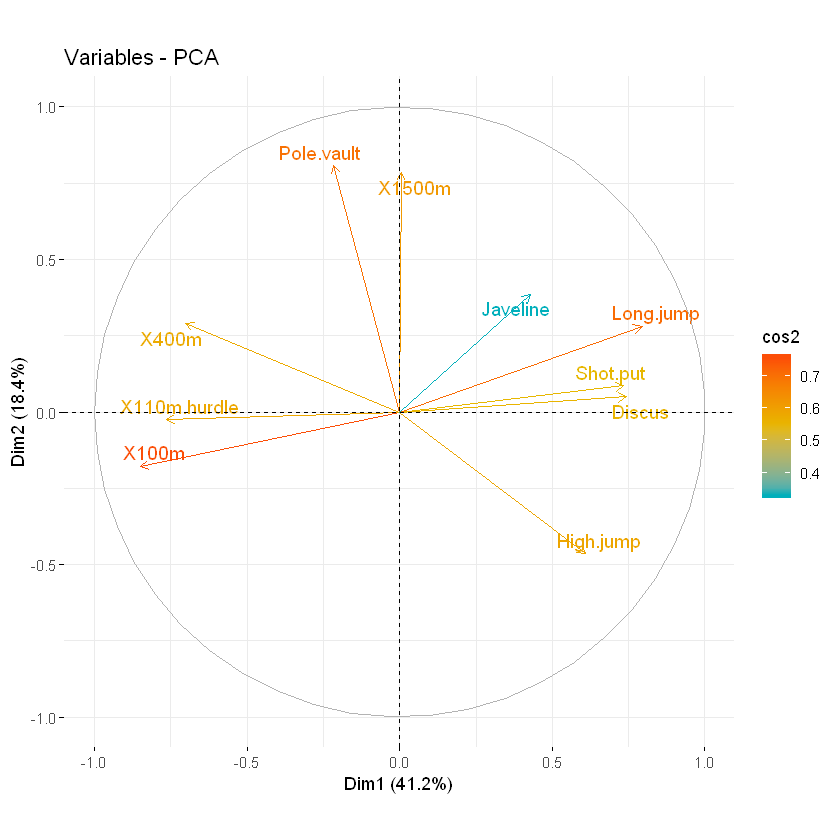

In [41]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

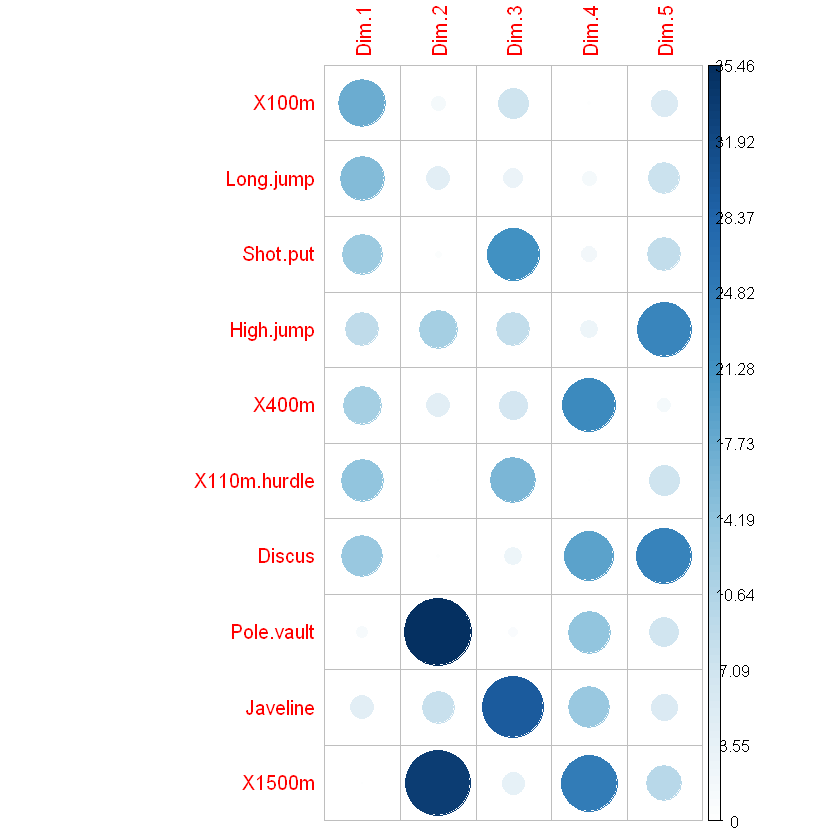

In [42]:
corrplot(var$contrib, is.corr=FALSE)

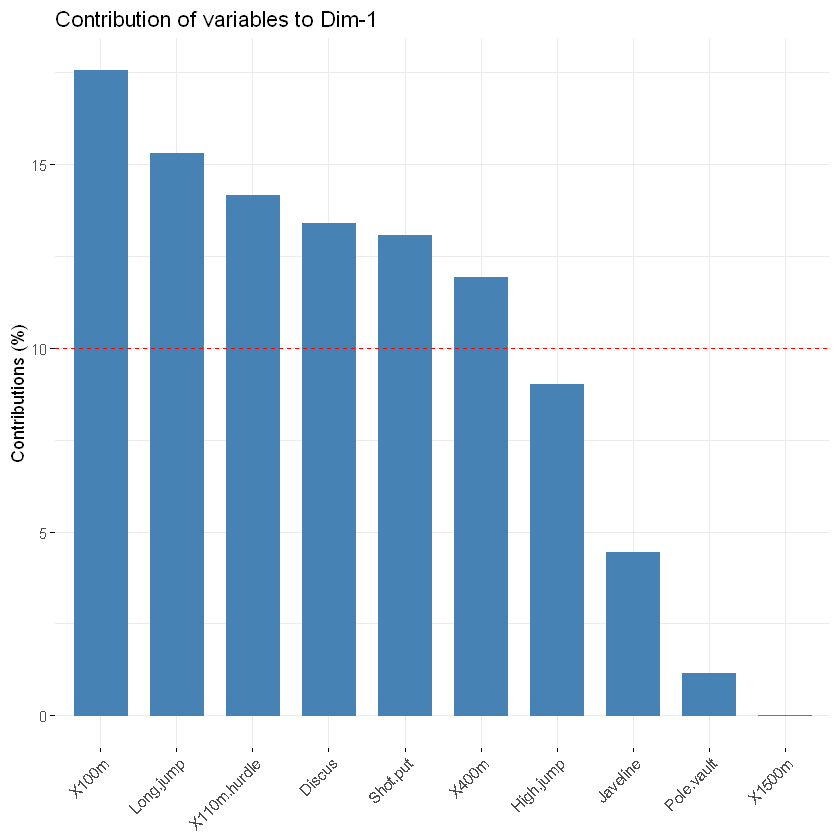

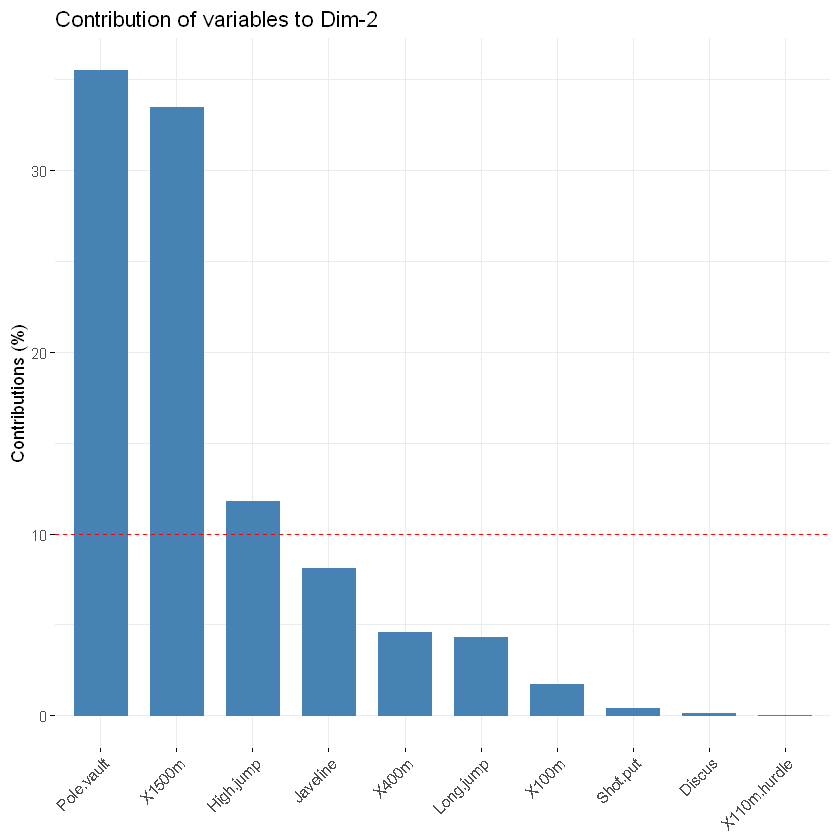

In [43]:
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

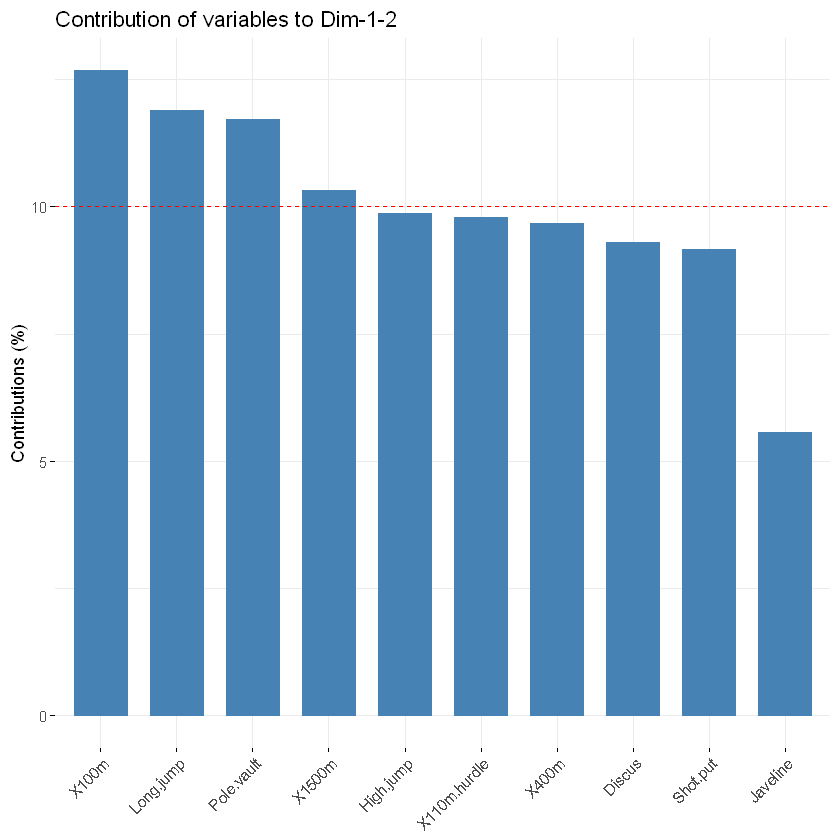

In [44]:
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)

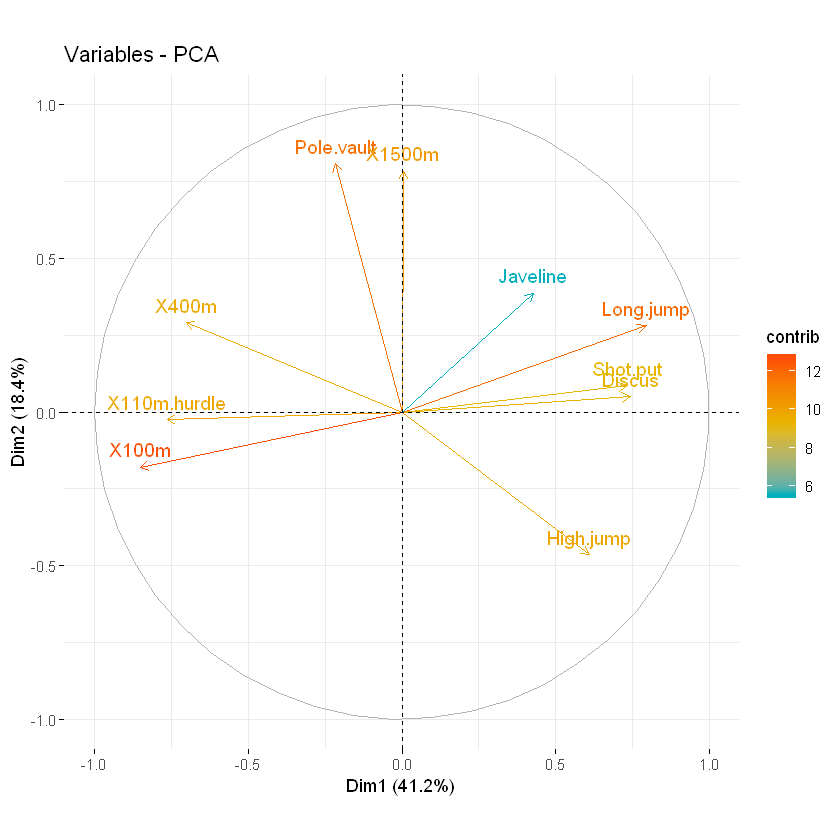

In [45]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

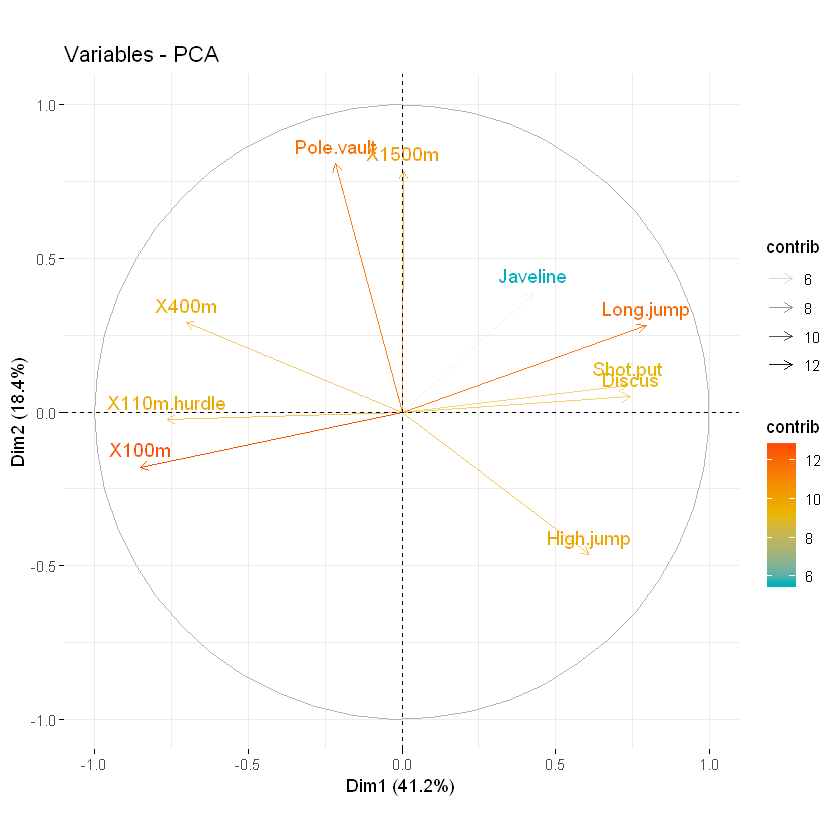

In [48]:
# Change the transparency by contrib values
fviz_pca_var(res.pca, alpha.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), col.var = "contrib")

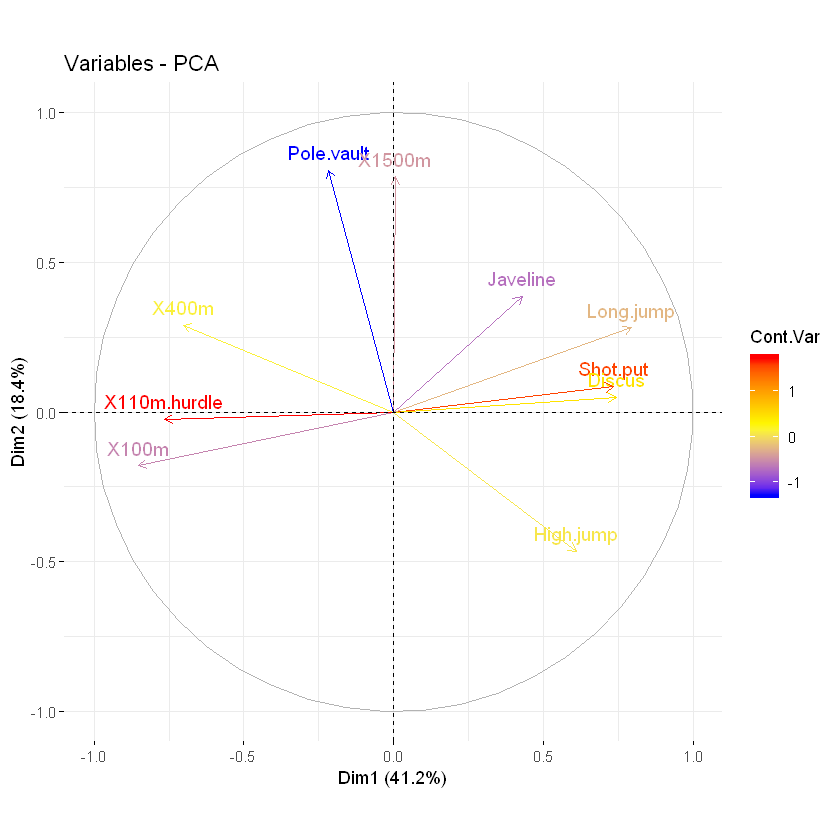

In [49]:
# Create a random continuous variable of length 10
set.seed(123)
my.cont.var <- rnorm(10)
# Color variables by the continuous variable
fviz_pca_var(res.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

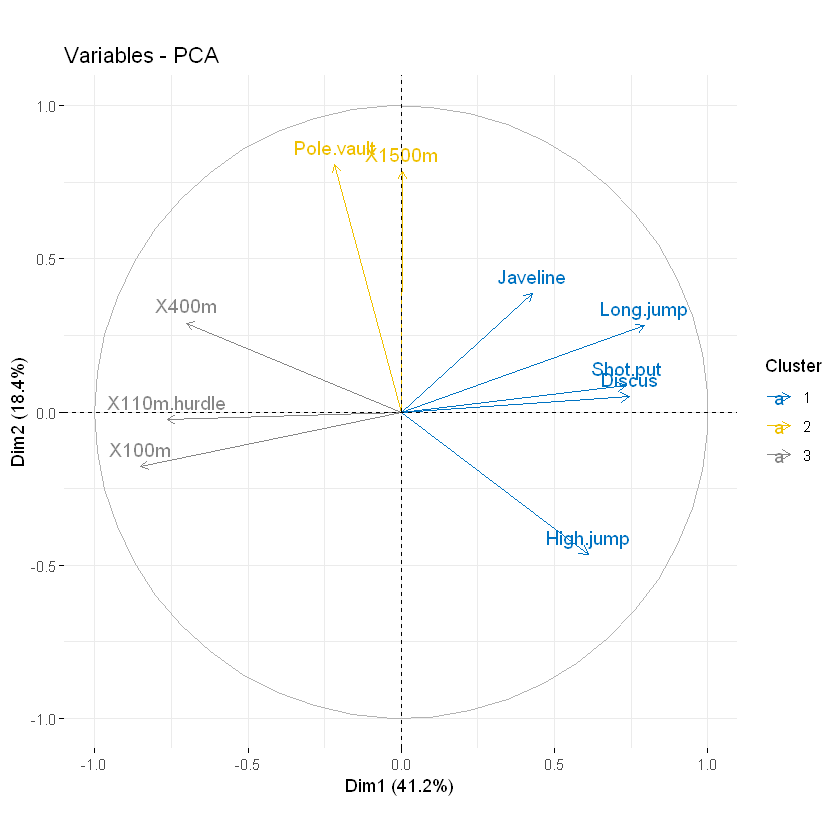

In [51]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

In [52]:
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1

,correlation,p.value
Long.jump,0.7941806,6.059893e-06
Discus,0.7432090,4.842563e-05
Shot.put,0.7339127,6.723102e-05
High.jump,0.6100840,1.993677e-03
Javeline,0.4282266,4.149192e-02
X400m,-0.7016034,1.910387e-04
X110m.hurdle,-0.7641252,2.195812e-05
X100m,-0.8506257,2.727129e-07


In [53]:
# Description of dimension 2
res.desc$Dim.2

,correlation,p.value
Pole.vault,0.8074511,3.205016e-06
X1500m,0.7844802,9.384747e-06
High.jump,-0.4652142,2.529390e-02


In [54]:
ind <- get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [55]:
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.1955047,1.5890567,0.6424912,0.08389652,1.16829387
CLAY,0.8078795,2.4748137,-1.3873827,1.29838232,-0.82498206
BERNARD,-1.3591340,1.6480950,0.2005584,-1.96409420,0.08419345
YURKOV,-0.8889532,-0.4426067,2.5295843,0.71290837,0.40782264
ZSIVOCZKY,-0.1081216,-2.0688377,-1.3342591,-0.10152796,-0.20145217
McMULLEN,0.1212195,-1.0139102,-0.8625170,1.34164291,1.62151286


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.007530179,0.49747323,0.081325232,0.001386688,0.2689026575
CLAY,0.048701249,0.45701660,0.143628117,0.125791741,0.0507850580
BERNARD,0.197199804,0.28996555,0.004294015,0.411819183,0.0007567259
YURKOV,0.096109800,0.02382571,0.778230322,0.061812637,0.0202279796
ZSIVOCZKY,0.001574385,0.57641944,0.239754152,0.001388216,0.0054654972
McMULLEN,0.002175437,0.15219499,0.110137872,0.266486530,0.3892621478


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.04029447,5.9714533,1.4483919,0.03734589,8.45894063
CLAY,0.68805664,14.4839248,6.7537381,8.94458283,4.21794385
BERNARD,1.94740183,6.4234107,0.1411345,20.46819433,0.04393073
YURKOV,0.83308415,0.4632733,22.4517396,2.69663605,1.03075263
ZSIVOCZKY,0.01232413,10.1217143,6.2464325,0.05469230,0.25151025
McMULLEN,0.01549089,2.4310854,2.6102794,9.55055888,16.29493304


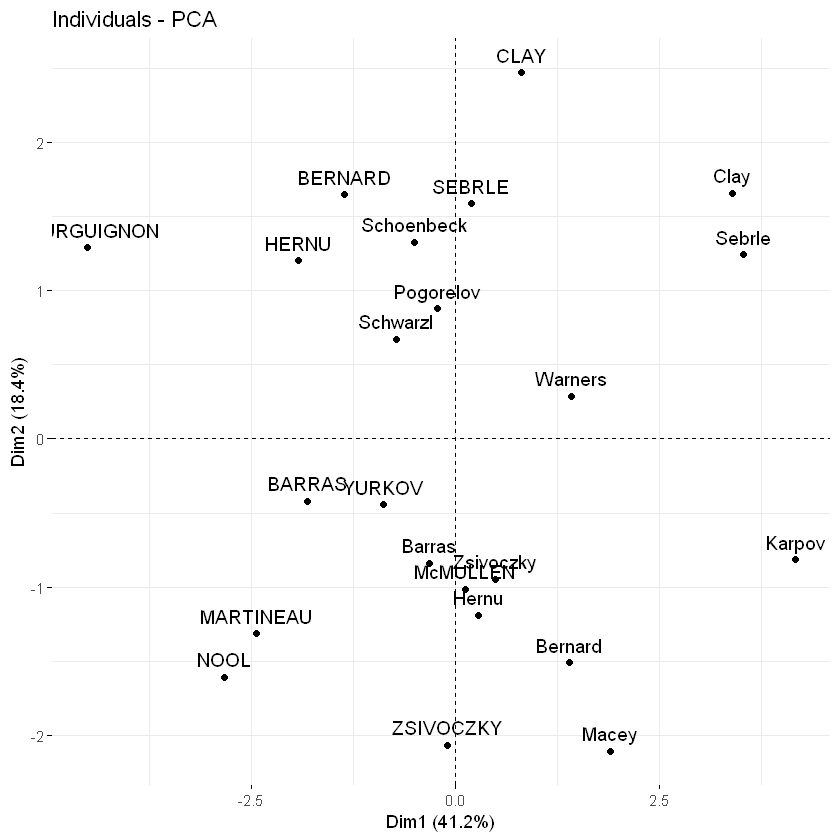

In [56]:
fviz_pca_ind(res.pca)

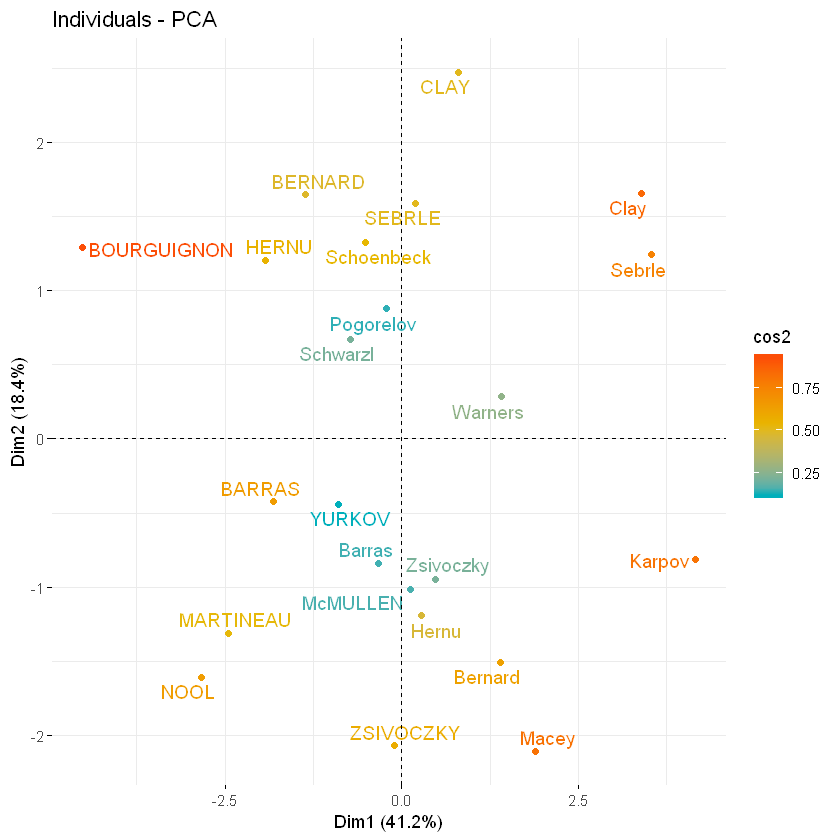

In [57]:
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

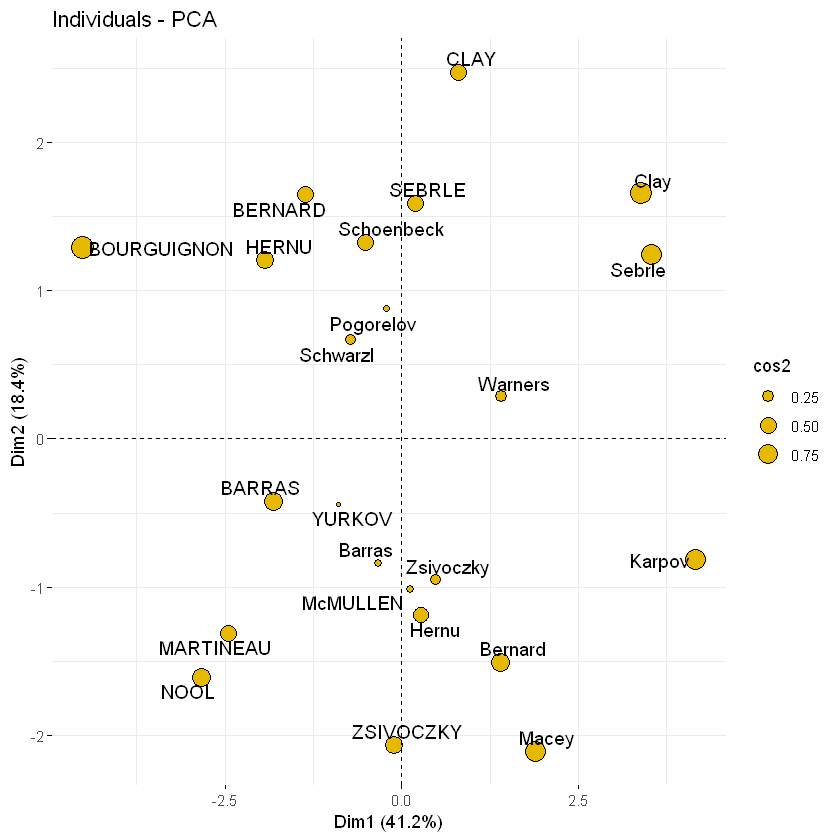

In [58]:
fviz_pca_ind(res.pca, pointsize = "cos2", 
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

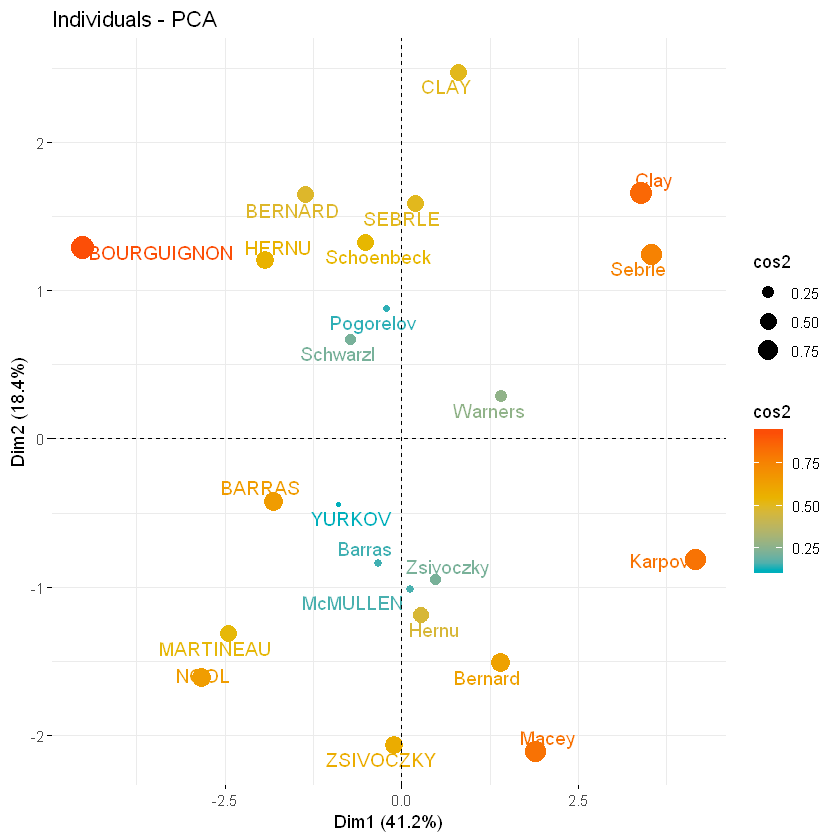

In [59]:
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

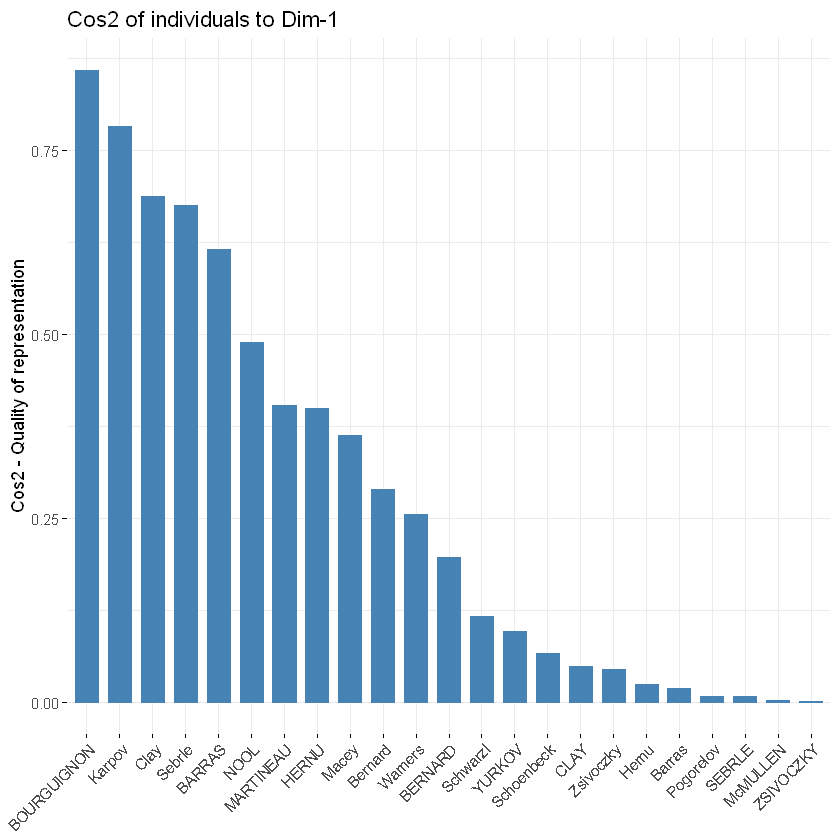

In [60]:
fviz_cos2(res.pca, choice = "ind")

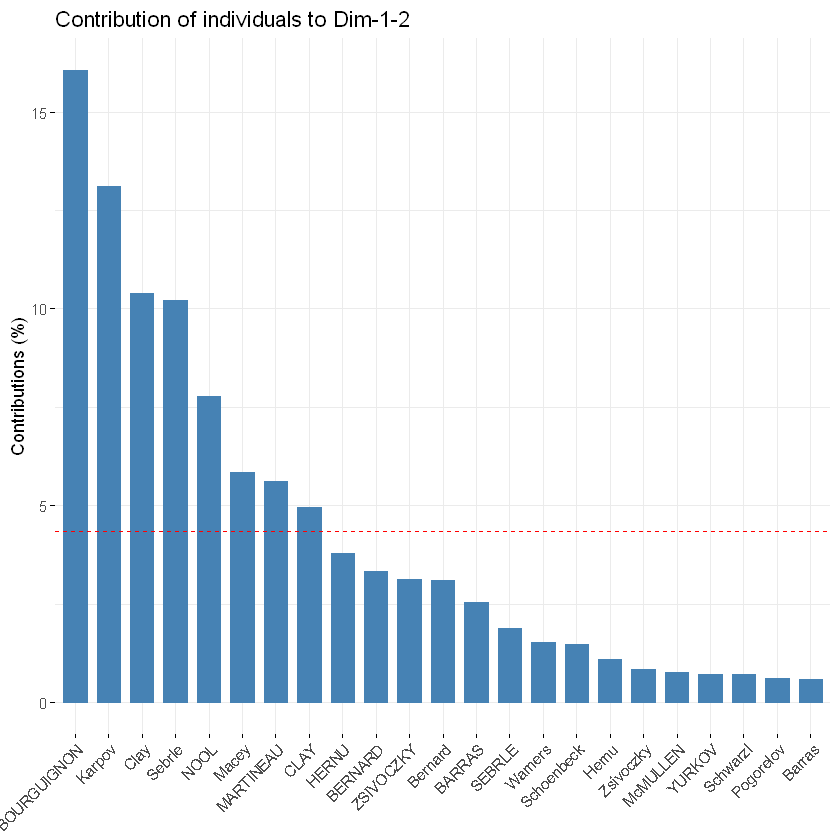

In [61]:
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2)

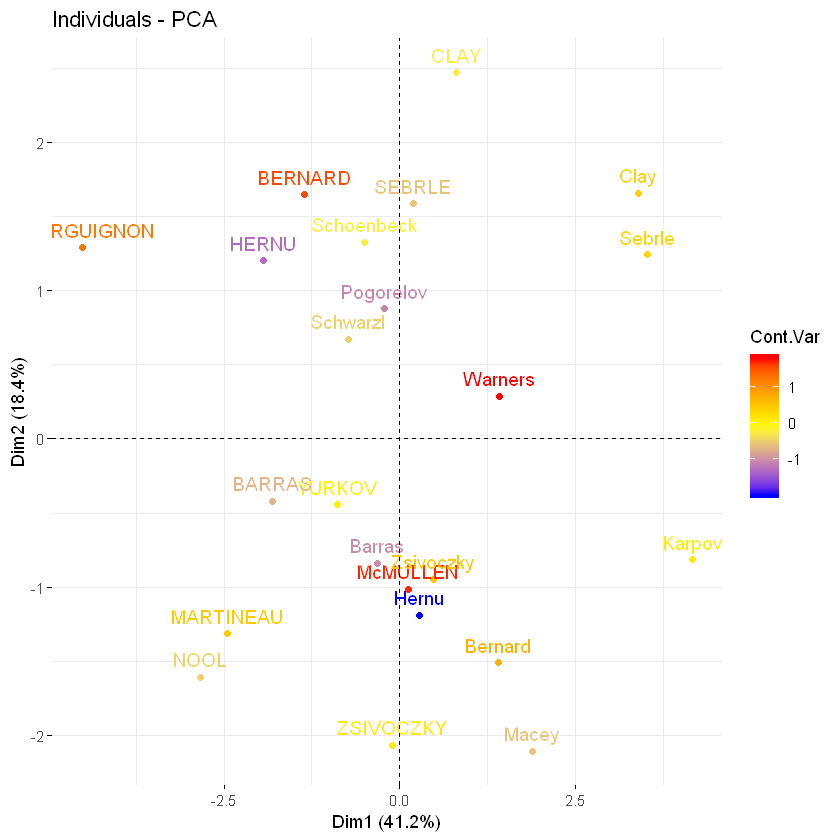

In [62]:
# Create a random continuous variable of length 23,
# Same length as the number of active individuals in the PCA
set.seed(123)
my.cont.var <- rnorm(23)
# Color individuals by the continuous variable
fviz_pca_ind(res.pca, col.ind = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

In [63]:
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


In [64]:
# The variable Species (index = 5) is removed
# before PCA analysis
iris.pca <- PCA(iris[,-5], graph = FALSE)

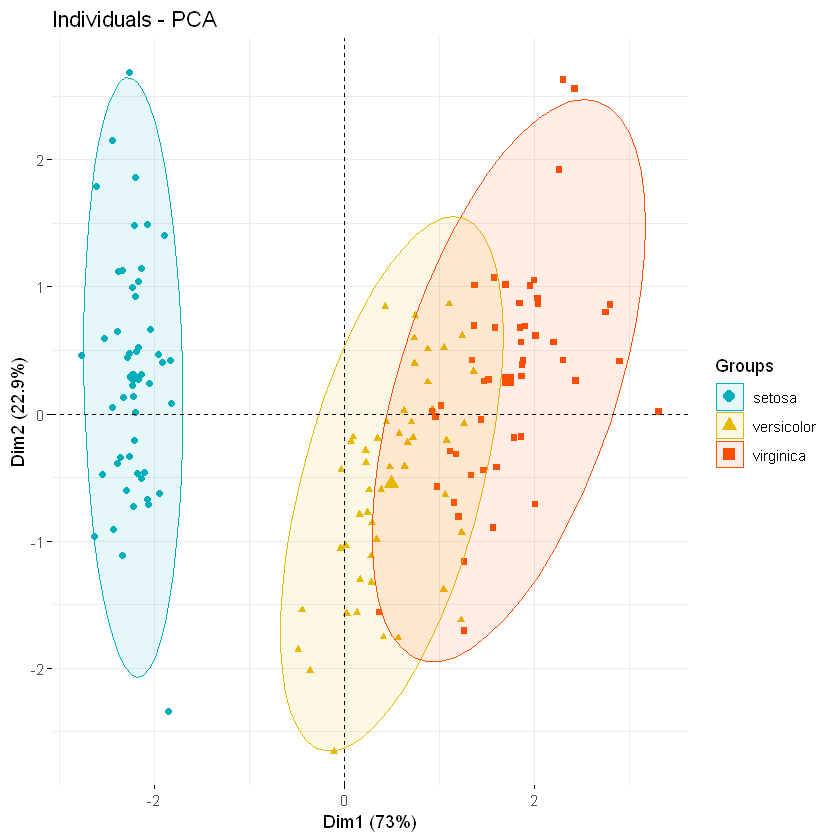

In [65]:
fviz_pca_ind(iris.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

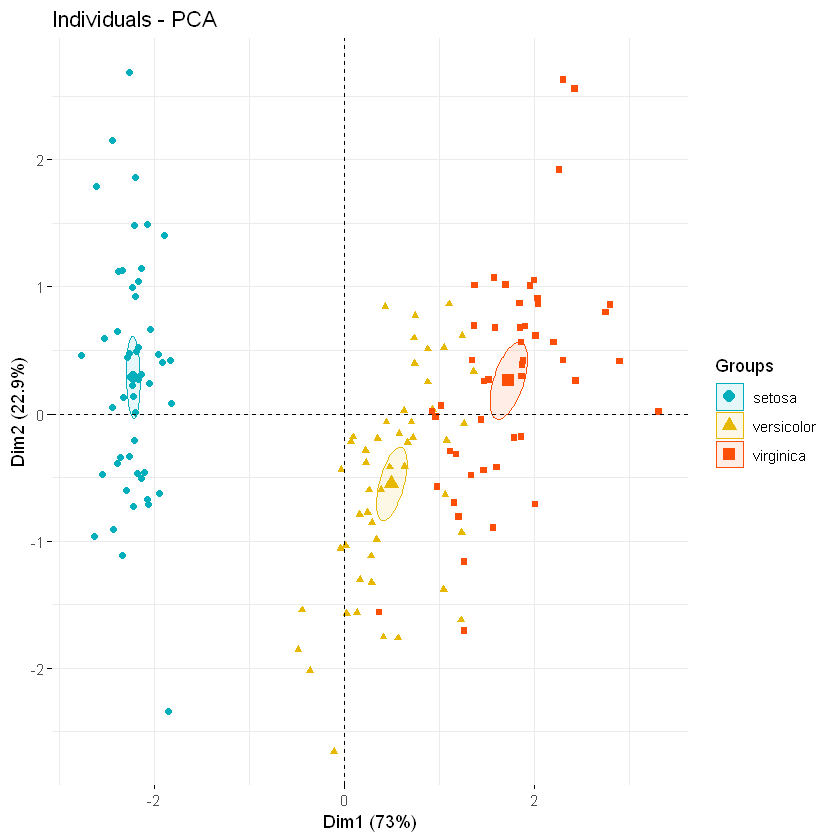

In [66]:
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point", col.ind = iris$Species, 
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )

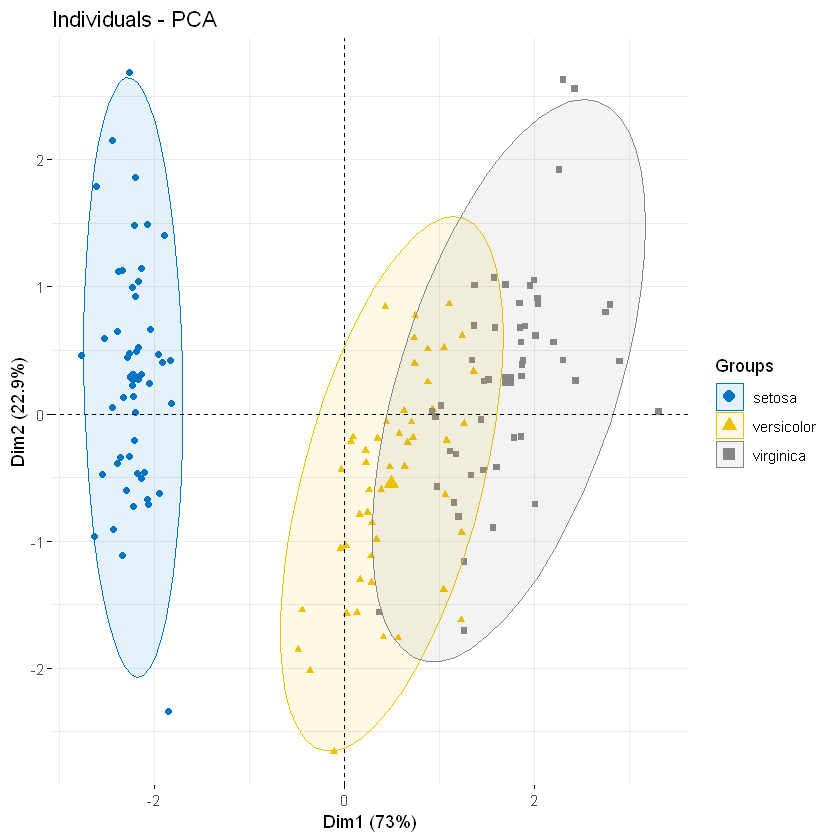

In [67]:
fviz_pca_ind(iris.pca,
             label = "none", # hide individual labels
             habillage = iris$Species, # color by groups
             addEllipses = TRUE, # Concentration ellipses
             palette = "jco"
             )

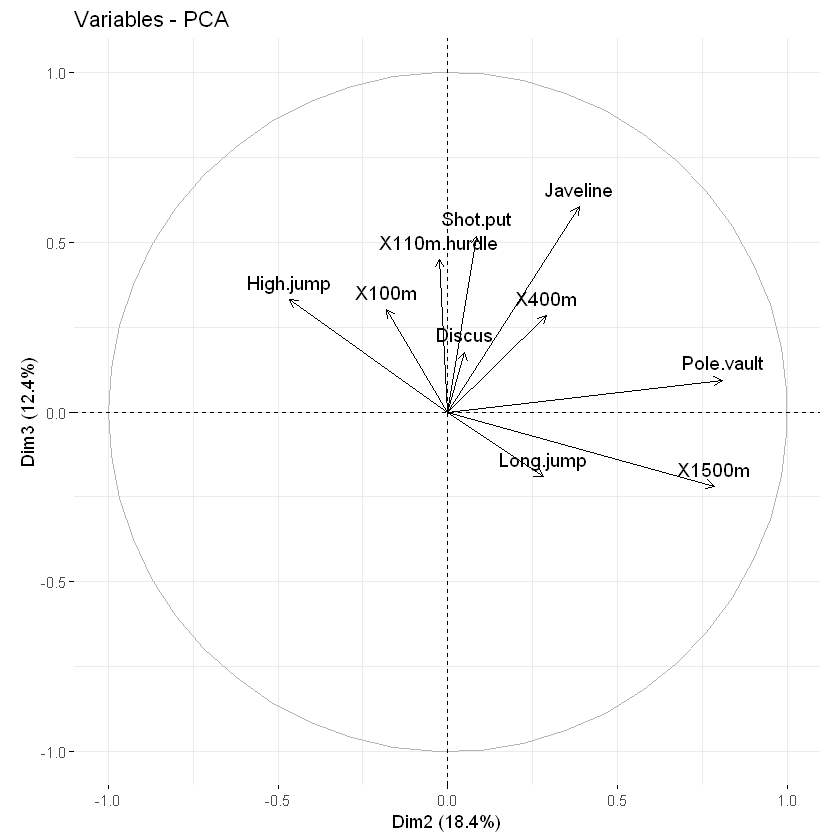

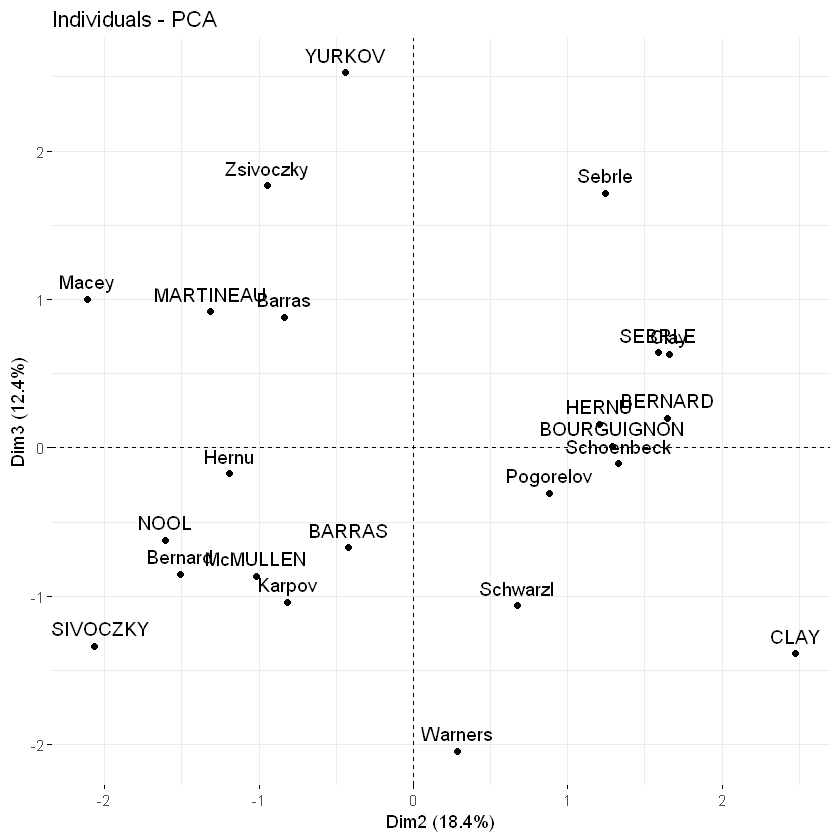

In [68]:
# Variables on dimensions 2 and 3
fviz_pca_var(res.pca, axes = c(2, 3))
# Individuals on dimensions 2 and 3
fviz_pca_ind(res.pca, axes = c(2, 3))

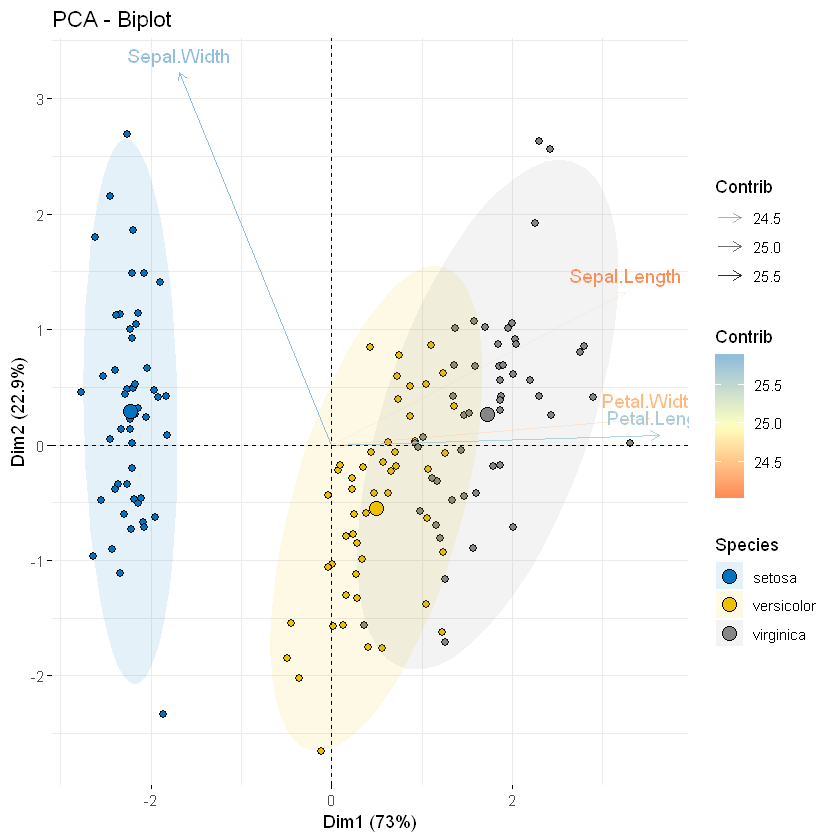

In [69]:
fviz_pca_biplot(iris.pca, 
                # Individuals
                geom.ind = "point",
                fill.ind = iris$Species, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "RdYlBu",
                
                legend.title = list(fill = "Species", color = "Contrib",
                                    alpha = "Contrib")
                )